In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils.land import get_ocean_coords, get_land_coords
from isca_tools.utils import area_weighting, lat_lon_slice
from isca_tools.land import write_land
from isca_tools.run.create_files import write_var

2025-02-06 11:50:14,893 - isca - WARNING - Environment variable GFDL_SOC not set, but this is only required if using SocratesCodebase. Setting to None


## Create bucket file
Reads in a bucket depth from a previous experiment, and creates bucket.nc file from it.

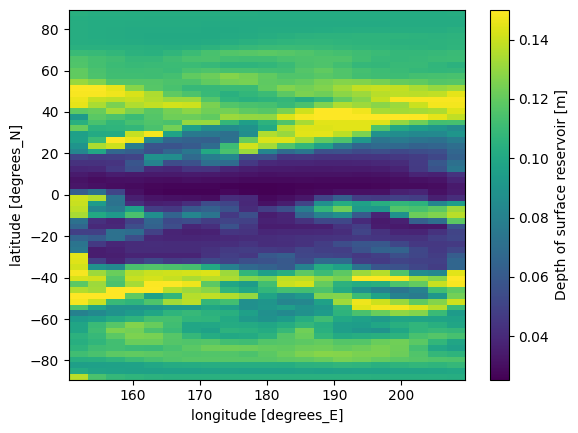

In [23]:
bucket_depth_input = isca_tools.load_dataset('/Users/joshduffield/Desktop/k=1').bucket_depth.isel(time=-1, drop=True)
bucket_depth_input.sel(lon=slice(150, 210)).plot()

In [48]:
# write above bucket depth to this experiment
exp_name = 'tau_sweep/land/meridional_band/bucket_file/const_time/'
job_path = '/Users/joshduffield/Documents/StAndrews/Isca/jobs/'
try:
    write_var('bucket', os.path.join(job_path, exp_name), var_array=bucket_depth_input.to_numpy(),
              lat_var=bucket_depth_input.lat.to_numpy(), lon_var=bucket_depth_input.lon.to_numpy())
except ValueError:
    print('bucket file already exists')

bucket file already exists


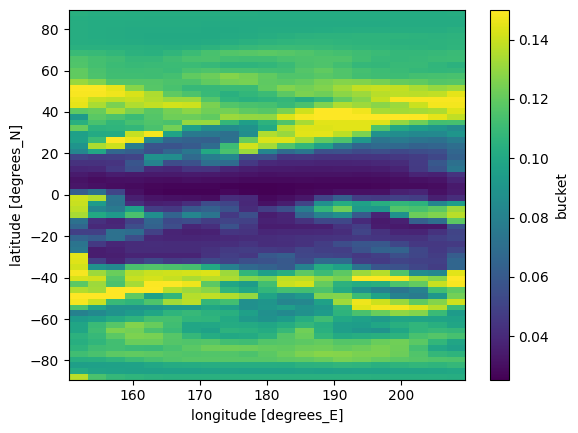

In [42]:
# Plot saved bucket depth
bucket_depth_saved = xr.load_dataset(os.path.join(job_path, exp_name)+'bucket.nc')
bucket_depth_saved.sel(lon=slice(150, 210)).bucket.plot()

In [43]:
# Sanity check that they are the same
np.abs(bucket_depth_saved.bucket.to_numpy() - bucket_depth_input.to_numpy()).max()

0.0

## Check simulation has this bucket depth for all times

In [46]:
bucket_depth_sim = isca_tools.load_dataset(exp_name).bucket_depth

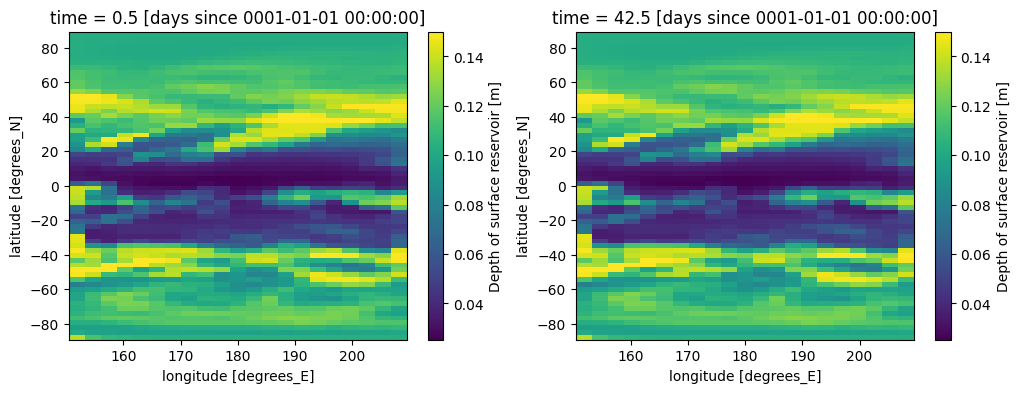

In [73]:
# plot a couple of days
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
bucket_depth_sim.sel(lon=slice(150, 210)).isel(time=0).plot(ax=ax[0])
bucket_depth_sim.sel(lon=slice(150, 210)).isel(time=42).plot(ax=ax[1])

In [74]:
# Check that it is same as input bucket depth
np.round(np.max(np.abs(bucket_depth_sim.to_numpy() - bucket_depth_saved.bucket.to_numpy()[np.newaxis]), axis=(1, 2)), 6)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)